In [2]:
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('/Volumes/GoogleDrive/My Drive/BEAM-CORE/BEAM Validation')

plt.style.use('ggplot')

In [3]:
# load data for validation
modeled_vmt = read_csv('sample output/AUS2017/0.linkstats.csv.gz', low_memory=False)
observed_vmt = read_csv('data for validation/Austin/VMT/austin_roadway_inventory.csv', low_memory=False)
model_network = read_csv('sample output/AUS2017/beam_network_by_county.csv', low_memory=False)
modeled_vmt.head(5)
modeled_vmt_by_hour = modeled_vmt.groupby('hour')[['volume']].sum()
print(modeled_vmt_by_hour)

         volume
hour           
0.0         0.0
1.0         0.0
2.0         0.0
3.0         0.0
4.0      5178.0
5.0   1304250.0
6.0   2902597.0
7.0   4736938.0
8.0   5034803.0
9.0   3622984.0
10.0  3547451.0
11.0  3559668.0
12.0  3610982.0
13.0  3798457.0
14.0  3597890.0
15.0  3826700.0
16.0  4336593.0
17.0  5249148.0
18.0  5263215.0
19.0  3726188.0
20.0  2921770.0
21.0  2731505.0
22.0  1932509.0
23.0  1512689.0
24.0   932322.0
25.0   700895.0
26.0   712100.0
27.0   682626.0
28.0   603215.0
29.0   493900.0
30.0   393113.0
31.0   385210.0
32.0   369604.0
33.0   399245.0
34.0   389638.0
35.0   375618.0
36.0   306605.0
37.0   287440.0
38.0   275437.0
39.0   236053.0
40.0   139296.0
41.0    85677.0
42.0    59467.0
43.0     6630.0
44.0     1317.0
45.0       95.0
46.0       29.0
47.0      448.0
48.0      500.0
49.0       14.0
50.0        0.0
51.0      308.0
52.0      168.0
53.0      271.0
54.0        4.0
55.0      101.0
56.0       78.0
57.0        0.0
58.0        0.0
59.0        0.0


In [4]:
total_lane_mile_observed = observed_vmt['LN_MILES'].sum()
print(total_lane_mile_observed)
observed_vmt.head(5)

31169.408


,CO,REC,HSUF,DIR_TRAV,STE_NAM,DI,CITY,MPA,RU,ADMIN,...,ADT_CUR,ADT_ADJ,TRK_AADT_P,AADT_TRUCK,LEN_SEC,LN_MILES,DVMT,DTRKVMT,County.Name,TxDOT..District.Name
0,11,0,NaN,4,NaN,14,39650,90,1,1,...,227,227,0.0,0,0.282,0.282,64.014,0.000,Bastrop,Austin
1,11,0,NaN,4,NaN,14,39650,90,1,1,...,3363,3363,0.0,0,0.280,0.280,941.640,0.000,Bastrop,Austin
2,11,0,NaN,4,NaN,14,39650,90,1,1,...,591,591,0.0,0,0.339,0.339,200.349,0.000,Bastrop,Austin
3,11,5,NaN,3,MT. PLEASANT RD,14,0,90,1,2,...,115,115,3.2,4,0.569,1.138,65.435,2.276,Bastrop,Austin
4,11,5,NaN,3,OLD MCDADE RD,14,0,90,1,2,...,226,226,3.2,7,0.277,0.554,62.602,1.939,Bastrop,Austin


In [10]:
meter_to_mile = 0.000621371
percent_of_samples = 0.25
mps_to_mph = 2.23694
model_network = model_network.drop_duplicates(subset=['linkId'])
model_network.head(5)
model_network.loc[:, 'lane_mile'] = meter_to_mile * model_network.loc[:, 'linkLength'] * model_network.loc[:, 'numberOfLanes']
total_lane_mile_modeled = model_network['lane_mile'].sum()
print(total_lane_mile_modeled)

46312.51890791604


In [11]:
# filter modeled network
model_vmt_24_hour = modeled_vmt.loc[(modeled_vmt['hour'] <= 28) & (modeled_vmt['hour'] >= 5)]
model_vmt_24_hour.loc[model_vmt_24_hour['hour']>=24, 'hour'] -= 24
model_network.loc[:, 'fromNodeId'] = model_network.loc[:, 'fromNodeId'].astype(int)
model_network.loc[:, 'toNodeId'] = model_network.loc[:, 'toNodeId'].astype(int)
model_vmt_24_hour = pd.merge(model_vmt_24_hour, model_network, 
                                 left_on = ['link', 'from', 'to'],
                                 right_on = ['linkId', 'fromNodeId', 'toNodeId'], how = 'left')
model_vmt_24_hour.head(5)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,link,from,to,hour,length_x,freespeed,capacity,stat,volume,traveltime,...,numberOfLanes,linkModes,attributeOrigId,attributeOrigType,fromNodeId,toNodeId,name,txdot_abbr,fips_code,lane_mile
0,285550,102109,120927,5.0,13.623,12.0112,2100.0,AVG,7.0,1.134191,...,1.0,car;walk;bike,544896591.0,tertiary,102109.0,120927.0,Williamson,14.0,491.0,0.008465
1,285550,102109,120927,6.0,13.623,12.0112,2100.0,AVG,9.0,1.134191,...,1.0,car;walk;bike,544896591.0,tertiary,102109.0,120927.0,Williamson,14.0,491.0,0.008465
2,285550,102109,120927,7.0,13.623,12.0112,2100.0,AVG,18.0,1.134191,...,1.0,car;walk;bike,544896591.0,tertiary,102109.0,120927.0,Williamson,14.0,491.0,0.008465
3,285550,102109,120927,8.0,13.623,12.0112,2100.0,AVG,22.0,1.134191,...,1.0,car;walk;bike,544896591.0,tertiary,102109.0,120927.0,Williamson,14.0,491.0,0.008465
4,285550,102109,120927,9.0,13.623,12.0112,2100.0,AVG,20.0,1.134191,...,1.0,car;walk;bike,544896591.0,tertiary,102109.0,120927.0,Williamson,14.0,491.0,0.008465


In [12]:
model_vmt_24_hour.loc[:, 'lane_mile'] = meter_to_mile * model_vmt_24_hour.loc[:, 'numberOfLanes'] * model_vmt_24_hour.loc[:, 'linkLength'] / 24.0
total_lane_mile_with_cars = model_vmt_24_hour.loc[:, 'lane_mile'].sum()
print(total_lane_mile_with_cars)

46312.518907916005


In [13]:
model_vmt_24_hour = model_vmt_24_hour.rename(columns = {'length_x': 'length_raw', 
                                                        'length_y': 'length_adj'})
print(model_vmt_24_hour.columns)

Index(['link', 'from', 'to', 'hour', 'length_raw', 'freespeed', 'capacity',
       'stat', 'volume', 'traveltime', 'Unnamed: 0', 'linkId', 'linkLength',
       'length_adj', 'linkFreeSpeed', 'linkCapacity', 'numberOfLanes',
       'linkModes', 'attributeOrigId', 'attributeOrigType', 'fromNodeId',
       'toNodeId', 'name', 'txdot_abbr', 'fips_code', 'lane_mile'],
      dtype='object')


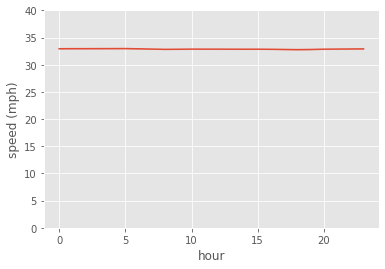

In [14]:
demand_scaling = 1/percent_of_samples
model_vmt_24_hour.loc[:, 'VMT'] = demand_scaling * meter_to_mile * model_vmt_24_hour.loc[:, 'linkLength'] * model_vmt_24_hour.loc[:, 'volume']
# model_vmt_24_hour.loc[:, 'travel_time (hr)'] = model_vmt_24_hour.loc[:, 'linkLength'] /3600

model_vmt_24_hour.loc[:, 'speed'] = model_vmt_24_hour.loc[:, 'linkLength'] / model_vmt_24_hour.loc[:, 'traveltime'] 
model_vmt_24_hour.loc[:, 'speed (mph)'] = mps_to_mph * model_vmt_24_hour.loc[:, 'speed']
model_vmt_24_hour.loc[:, 'volume'] *= demand_scaling
sns.lineplot(x = 'hour', y = 'speed (mph)', data = model_vmt_24_hour, ci = 95)
plt.ylim([0, 40])
plt.savefig('plot/aus2017_modeled_speed_for_all_links.png', dpi = 200)
plt.show()


In [15]:
# create 24 pivot table for speed and volume
speed_by_hour = pd.pivot_table(model_vmt_24_hour, values='speed (mph)', 
                               index=['linkId', 'fromNodeId', 'toNodeId'],
                    columns=['hour'])
speed_by_hour.columns = ['speed_' + str(i+1) for i in range(24)]
speed_by_hour = speed_by_hour.reset_index()
# print(speed_by_hour.head(5))

volume_by_hour = pd.pivot_table(model_vmt_24_hour, values='volume', 
                               index=['linkId', 'fromNodeId', 'toNodeId'],
                    columns=['hour'])
volume_by_hour.columns = ['volume_' + str(i+1) for i in range(24)]
volume_by_hour = volume_by_hour.reset_index()

combined_metric_by_hour = pd.merge(speed_by_hour, volume_by_hour, 
                                   on = ['linkId', 'fromNodeId', 'toNodeId'],
                                    how = 'outer')
combined_metric_by_hour.head(5)
combined_metric_by_hour.to_csv('sample output/AUS2017/processed_linkstats.csv', 
                               sep = ',', index = False)

In [16]:
model_vmt_by_county = model_vmt_24_hour.groupby(['name'])[['VMT']].sum()
model_vmt_by_county = model_vmt_by_county.reset_index()
model_vmt_by_county

,name,VMT
0,Bastrop,1.133538e+06
1,Burnet,7.580674e+05
2,Caldwell,4.863873e+05
3,Hays,1.928983e+06
4,Travis,1.928523e+07
5,Williamson,7.144108e+06


In [11]:
print(len(combined_metric_by_hour))

360226


In [17]:
observed_vmt.loc[:, 'PVMT'] = observed_vmt.loc[:, 'DVMT'] - observed_vmt.loc[:, 'DTRKVMT']
observed_vmt_by_county = observed_vmt.groupby('County.Name')[['PVMT']].sum()
observed_vmt_by_county = observed_vmt_by_county.reset_index()
observed_vmt_by_county

,County.Name,PVMT
0,Bastrop,4.794145e+06
1,Burnet,1.755911e+06
2,Caldwell,1.827492e+06
3,Hays,1.071075e+07
4,Travis,5.805417e+07
5,Williamson,2.173452e+07


In [18]:
VMT_comparison = pd.merge(model_vmt_by_county, observed_vmt_by_county, 
                          left_on = 'name', right_on = 'County.Name', how = 'left')
VMT_comparison = VMT_comparison.loc[:, ['name', 'VMT', 'PVMT']]
VMT_comparison.columns = ['county', 'modeled_VMT', 'observed_VMT']
VMT_comparison

,county,modeled_VMT,observed_VMT
0,Bastrop,1.133538e+06,4.794145e+06
1,Burnet,7.580674e+05,1.755911e+06
2,Caldwell,4.863873e+05,1.827492e+06
3,Hays,1.928983e+06,1.071075e+07
4,Travis,1.928523e+07,5.805417e+07
5,Williamson,7.144108e+06,2.173452e+07


modeled_VMT     3.073631e+07
observed_VMT    9.887699e+07
dtype: float64


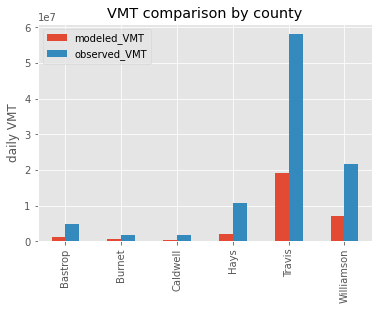

In [19]:
VMT_comparison.plot.bar(x = 'county')

print(VMT_comparison.loc[:, ['modeled_VMT', 'observed_VMT']].sum())
plt.xlabel('')
plt.ylabel('daily VMT')
plt.title('VMT comparison by county')
plt.savefig('plot/austin2017_VMT_comparison_by_county.png', dpi = 200, bbox_inches = 'tight')
plt.show()

In [20]:
# assign roadway classification to modeled network, 
# ref: https://wiki.openstreetmap.org/wiki/User:UltimateRiff/HFCS
modeled_roadtype = model_vmt_24_hour.attributeOrigType.unique()
modeled_roadtype_lookup = {'tertiary': 'Minor collector',
                           'trunk_link': 'Freeway and major arterial',
                           'residential': 'Local',
                           'track': 'Local',
                           'footway': 'Local',
                           'motorway': 'Freeway and major arterial',
                           'secondary': 'Major collector',
                           'unclassified': 'Local',
                           'path': 'Local',
                           'secondary_link': 'Major collector',
                           'primary': 'Minor arterial',
                           'motorway_link': 'Freeway and major arterial',
                           'primary_link': 'Minor arterial',
                           'trunk': 'Freeway and major arterial',
                           'pedestrian': 'Local',
                           'tertiary_link': 'Minor collector',
                           'cycleway': 'Local',
                           np.nan: 'Local',
                           'steps': 'Local',
                           'living_street': 'Local', 
                           'bus_stop': 'Local',
                           'corridor': 'Local', 
                           'road': 'Local',
                           'bridleway': 'Local'}

observed_roadtype_lookup = {1: 'Freeway and major arterial',
                            2: 'Freeway and major arterial',
                            3: 'Freeway and major arterial',
                            4: 'Minor arterial',
                            5: 'Major collector',
                            6: 'Minor collector',
                            7: 'Local'}
model_vmt_24_hour.loc[:, 'road_class'] = model_vmt_24_hour.loc[:, 'attributeOrigType'].map(modeled_roadtype_lookup)
observed_vmt.loc[:, 'road_class'] = observed_vmt.loc[:, 'F_SYSTEM'].map(observed_roadtype_lookup)
# print(modeled_roadtype)

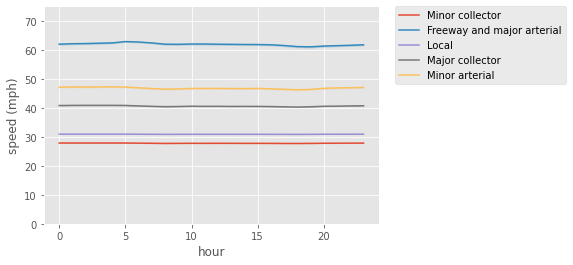

In [21]:
sns.lineplot(x = 'hour', y = 'speed (mph)', hue = 'road_class',
             data = model_vmt_24_hour, ci = 98)
plt.ylim([0, 75])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('plot/aus2017_modeled_speed_by_roadtype.png', dpi = 200, bbox_inches= 'tight')
plt.show()

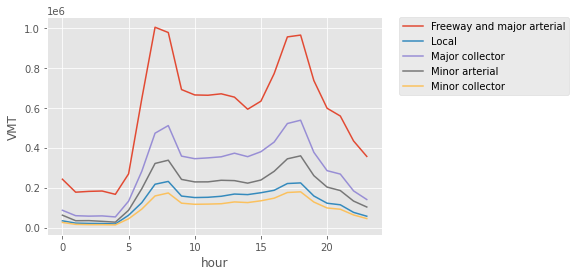

In [22]:
model_vmt_by_hour_roadtype = model_vmt_24_hour.groupby(['hour', 'road_class'])[['VMT']].sum()
model_vmt_by_hour_roadtype = model_vmt_by_hour_roadtype.reset_index()
sns.lineplot(x = 'hour', y = 'VMT', hue = 'road_class',
             data = model_vmt_by_hour_roadtype, ci = None)
# plt.ylim([0, 75])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('plot/aus2017_modeled_VMT_by_hour_roadtype.png', dpi = 200, bbox_inches= 'tight')
plt.show()

In [23]:
model_vmt_by_roadtype = model_vmt_24_hour.groupby(['road_class'])[['VMT']].sum()
model_vmt_by_roadtype = model_vmt_by_roadtype.reset_index()
observed_vmt_by_roadtype = observed_vmt.groupby(['road_class'])[['PVMT']].sum()
observed_vmt_by_roadtype = observed_vmt_by_roadtype.reset_index()
VMT_comparison_by_roadtype = pd.merge(model_vmt_by_roadtype, observed_vmt_by_roadtype, 
                          on = 'road_class', how = 'left')
# VMT_comparison = VMT_comparison.loc[:, ['name', 'VMT', 'PVMT']]
VMT_comparison_by_roadtype.columns = ['road_class', 'modeled_VMT', 'observed_VMT']
VMT_comparison_by_roadtype

,road_class,modeled_VMT,observed_VMT
0,Freeway and major arterial,1.377470e+07,7.671719e+07
1,Local,3.030264e+06,3.603360e+06
2,Major collector,6.962906e+06,1.012683e+07
3,Minor arterial,4.626684e+06,7.713755e+06
4,Minor collector,2.341759e+06,7.158526e+05


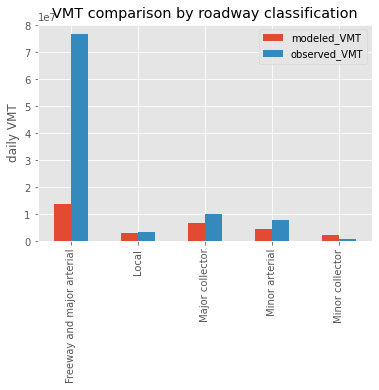

In [24]:
VMT_comparison_by_roadtype.plot.bar(x = 'road_class')
plt.xlabel('')
plt.ylabel('daily VMT')
plt.title('VMT comparison by roadway classification')
plt.savefig('plot/austin2017_VMT_comparison_by_roadway_type.png', dpi = 200)
plt.show()

/var/folders/w6/7qcyt43n21ddydhdfdslrp7c0000gp/T/ipykernel_24872/3281618090.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0f}%'.format(x*100) for x in ax.get_yticks()])


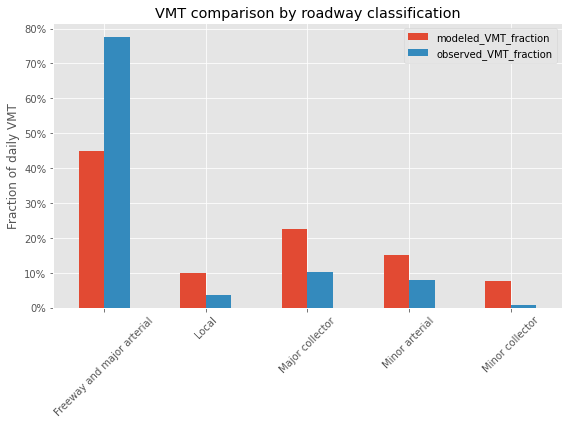

In [25]:
VMT_comparison_by_roadtype.loc[:, 'modeled_VMT_fraction'] = VMT_comparison_by_roadtype.loc[:, 'modeled_VMT'] / VMT_comparison_by_roadtype.loc[:, 'modeled_VMT'].sum()
VMT_comparison_by_roadtype.loc[:, 'observed_VMT_fraction'] = VMT_comparison_by_roadtype.loc[:, 'observed_VMT'] / VMT_comparison_by_roadtype.loc[:, 'observed_VMT'].sum()
percent_VMT_comparison_by_roadtype = VMT_comparison_by_roadtype.loc[:, ['road_class', 'modeled_VMT_fraction', 'observed_VMT_fraction']]

import matplotlib.ticker as mtick
# plt.figure(figsize = (12,8))
ax = percent_VMT_comparison_by_roadtype.plot.bar(x = 'road_class',figsize = (8,6))
# ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
plt.xlabel('')
plt.xticks(rotation = 45)
ax.set_yticklabels(['{:.0f}%'.format(x*100) for x in ax.get_yticks()]) 
# vals = ax.get_yticks()
# ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.ylabel('Fraction of daily VMT')
plt.title('VMT comparison by roadway classification')
plt.tight_layout()
plt.savefig('plot/austin2017_percent_VMT_comparison_by_roadway_type.png', dpi = 200)
plt.show()

<AxesSubplot:xlabel='attributeOrigType'>

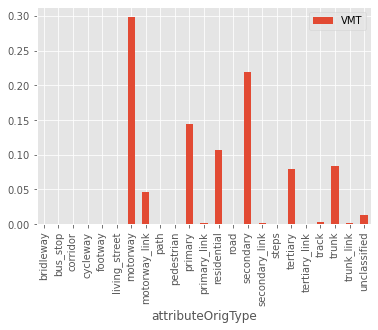

In [33]:
model_vmt_by_osmtype = model_vmt_24_hour.groupby(['attributeOrigType'])[['VMT']].sum()
model_vmt_by_osmtype.loc[:, 'VMT'] /= model_vmt_by_osmtype.loc[:, 'VMT'].sum()
model_vmt_by_osmtype.plot.bar()